# Voting Ensemble

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [27]:
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species']=pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()

In [5]:
df['Species']=le.fit_transform(df['Species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

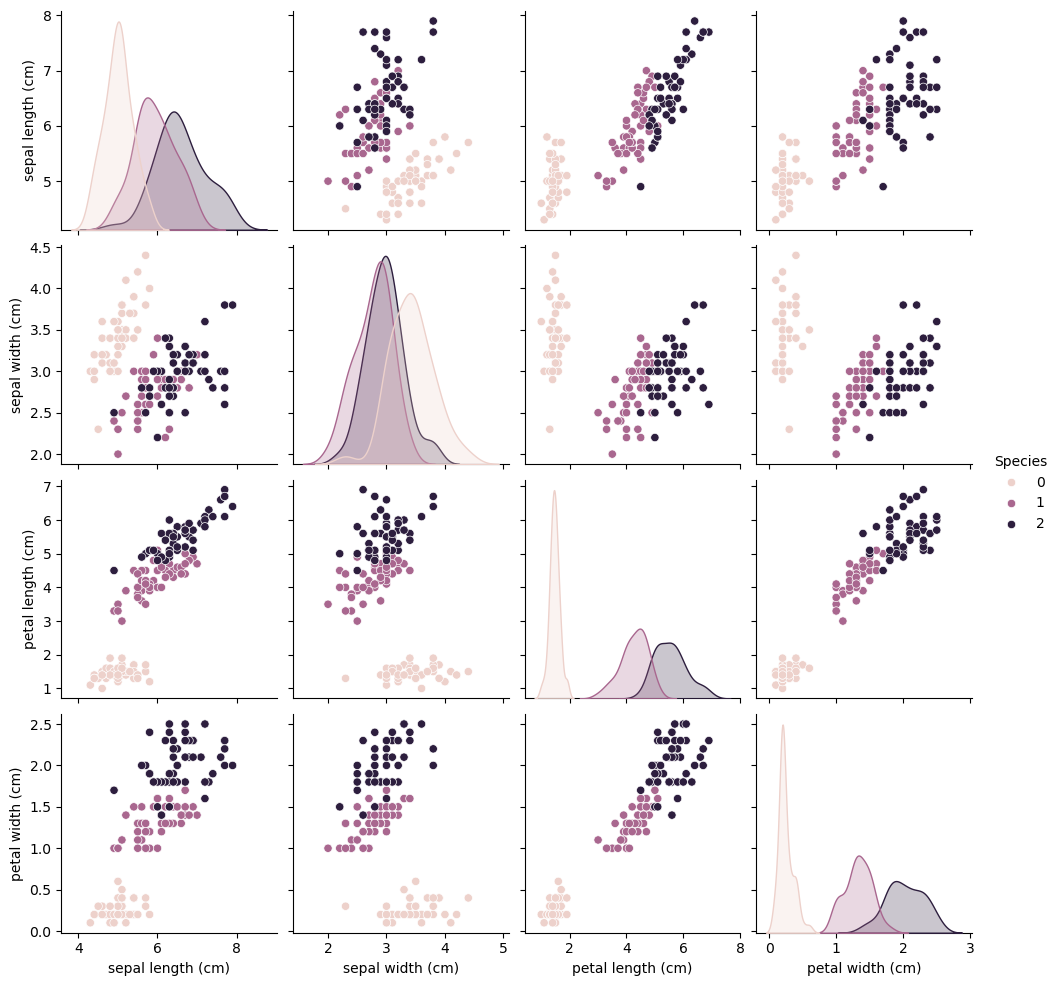

In [7]:
sns.pairplot(df, hue='Species')
plt.show()

In [8]:
df=df[df['Species']!=0][['sepal length (cm)','sepal width (cm)','Species']]
df

,sepal length (cm),sepal width (cm),Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [9]:
X=df.iloc[:,0:2]
y=df.iloc[:, -1]

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [11]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=RandomForestClassifier()

In [12]:
estimators=[('lr', clf1), ('knn',clf2), ('rfc',clf3)]

In [13]:
for i in estimators:
    x=cross_val_score(i[1], X, y, cv=10, scoring='accuracy')
    print(i[0], np.round(np.mean(x), 2))

lr 0.75
knn 0.62
rfc 0.63


In [13]:
from sklearn.ensemble import VotingClassifier

In [15]:
vc=VotingClassifier(estimators=estimators, voting='hard')
x=cross_val_score(vc, X, y, scoring='accuracy', cv=10)
print(np.round(np.mean(x),2))

0.68


In [16]:
vc=VotingClassifier(estimators=estimators, voting='soft')
x=cross_val_score(vc, X, y, scoring='accuracy', cv=10)
print(np.round(np.mean(x),2))

0.66


In [17]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators, voting='soft', weights=[i,j,k])
            x=cross_val_score(vc, X, y, scoring='accuracy', cv=10)
            print("for i={} j={} k={}".format(i,j,k), np.round(np.mean(x),2))

for i=1 j=1 k=1 0.64
for i=1 j=1 k=2 0.66
for i=1 j=1 k=3 0.61
for i=1 j=2 k=1 0.66
for i=1 j=2 k=2 0.64
for i=1 j=2 k=3 0.62
for i=1 j=3 k=1 0.66
for i=1 j=3 k=2 0.63
for i=1 j=3 k=3 0.63
for i=2 j=1 k=1 0.68
for i=2 j=1 k=2 0.64
for i=2 j=1 k=3 0.62
for i=2 j=2 k=1 0.67
for i=2 j=2 k=2 0.67
for i=2 j=2 k=3 0.63
for i=2 j=3 k=1 0.67
for i=2 j=3 k=2 0.65
for i=2 j=3 k=3 0.65
for i=3 j=1 k=1 0.72
for i=3 j=1 k=2 0.65
for i=3 j=1 k=3 0.64
for i=3 j=2 k=1 0.7
for i=3 j=2 k=2 0.67
for i=3 j=2 k=3 0.64
for i=3 j=3 k=1 0.68
for i=3 j=3 k=2 0.65
for i=3 j=3 k=3 0.65


In [13]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
X.shape

(20640, 8)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [17]:
clf1=LinearRegression()
clf2=DecisionTreeRegressor()
clf3=SVR()

In [18]:
estimators=[('lr', clf1), ('dtr',clf2), ('svr',clf3)]

In [24]:
for i in estimators:
    x=cross_val_score(i[1], X, y, cv=10, scoring='r2')
    print(i[0], np.round(np.mean(x), 2))

lr 0.51
dtr 0.25
svr -0.25


In [21]:
from sklearn.ensemble import VotingRegressor

In [26]:
vr=VotingRegressor(estimators)
x=cross_val_score(vr, X, y, scoring='r2', cv=10)
print("Voting Regressor", np.round(np.mean(x),2))

Voting Regressor 0.48


In [ ]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingRegressor(estimators, weights=[i,j,k])
            x=cross_val_score(vc, X, y, scoring='r2', cv=10)
            print("for i={} j={} k={}".format(i,j,k), np.round(np.mean(x),2))

for i=1 j=1 k=1 0.47


# Bagging Ensemble

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [29]:
df["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
df["Species"]=le.fit_transform(df["Species"])

In [33]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [45]:
df=df[["sepal width (cm)","petal length (cm)", "Species"]]
df=df[df["Species"]!=0]
df

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


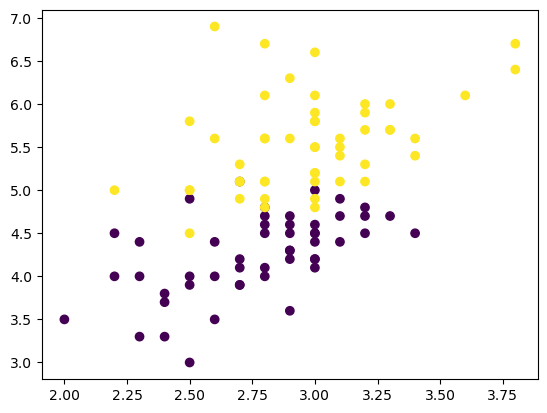

In [46]:
plt.scatter(df["sepal width (cm)"], df["petal length (cm)"], c=df["Species"])

In [58]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [59]:
df_train

,sepal width (cm),petal length (cm),Species
117,3.8,6.7,2
74,2.9,4.3,1
90,2.6,4.4,1
106,2.5,4.5,2
76,2.8,4.8,1
126,2.8,4.8,2
82,2.7,3.9,1
102,3.0,5.9,2
130,2.8,6.1,2
148,3.4,5.4,2


In [60]:
df_test

,sepal width (cm),petal length (cm),Species
127,3.0,4.9,2
88,3.0,4.1,1
72,2.5,4.9,1
87,2.3,4.4,1
110,3.2,5.1,2


In [61]:
df_val

,sepal width (cm),petal length (cm),Species
79,2.6,3.5,1
124,3.3,5.7,2
129,3.0,5.8,2
119,2.2,5.0,2
149,3.0,5.1,2


In [66]:
X_test=df_val.iloc[:, 0:2]
y_test=df_val.iloc[:, -1]

In [77]:
df_bag=df_train.sample(8, replace=True)
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
130,2.8,6.1,2
76,2.8,4.8,1
90,2.6,4.4,1
126,2.8,4.8,2
82,2.7,3.9,1
106,2.5,4.5,2
148,3.4,5.4,2
126,2.8,4.8,2


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [84]:
dt_bag1=DecisionTreeClassifier()

In [88]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

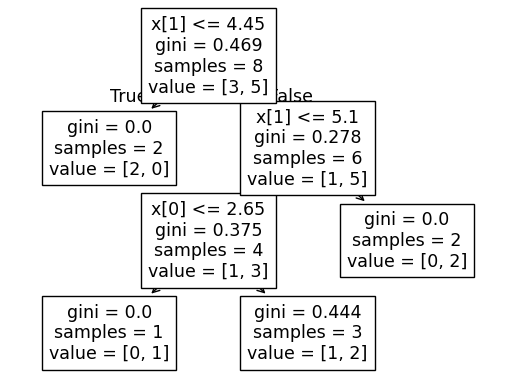

1.0


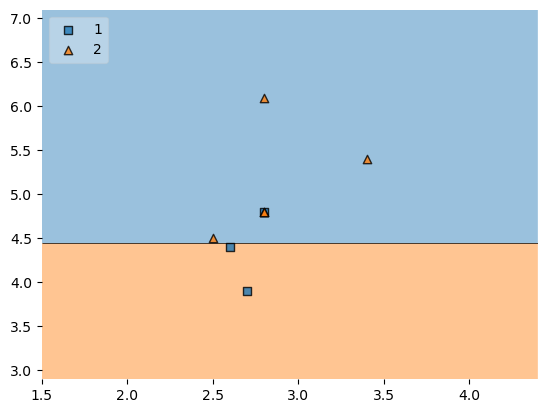

In [92]:
evaluate(dt_bag1, X, y)

In [93]:
df_bag=df_train.sample(8, replace=True)
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
117,3.8,6.7,2
126,2.8,4.8,2
130,2.8,6.1,2
90,2.6,4.4,1
74,2.9,4.3,1
76,2.8,4.8,1
102,3.0,5.9,2
130,2.8,6.1,2


In [94]:
dt_bag2=DecisionTreeClassifier()

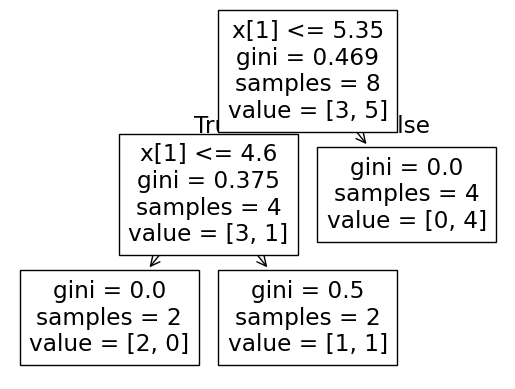

0.6


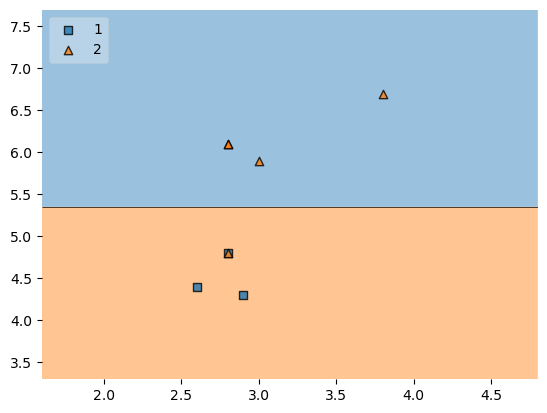

In [95]:
evaluate(dt_bag2, X, y)

In [96]:
df_bag=df_train.sample(8, replace=True)
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
148,3.4,5.4,2
148,3.4,5.4,2
76,2.8,4.8,1
106,2.5,4.5,2
130,2.8,6.1,2
90,2.6,4.4,1
82,2.7,3.9,1
106,2.5,4.5,2


In [97]:
dt_bag3=DecisionTreeClassifier()

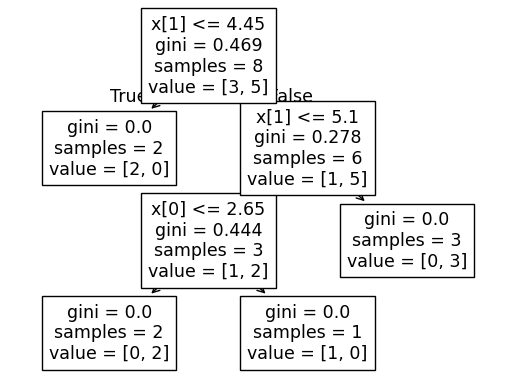

0.8


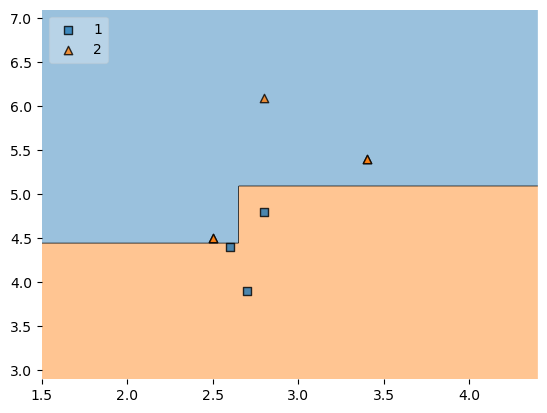

In [98]:
evaluate(dt_bag3, X, y)

In [99]:
df_test

,sepal width (cm),petal length (cm),Species
127,3.0,4.9,2
88,3.0,4.1,1
72,2.5,4.9,1
87,2.3,4.4,1
110,3.2,5.1,2


In [104]:
print("Preditor 1", dt_bag1.predict(np.array([3, 4.1]).reshape(1, 2)))
print("Preditor 2", dt_bag2.predict(np.array([3, 4.1]).reshape(1, 2)))
print("Preditor 3", dt_bag3.predict(np.array([3, 4.1]).reshape(1, 2)))

Preditor 1 [1]
Preditor 2 [1]
Preditor 3 [1]


# Bagging Classifiers

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [110]:
X, y=make_classification(n_samples=10000, n_features=10, n_informative=3)

In [113]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [123]:
dt=DecisionTreeClassifier(random_state=4)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.941


In [127]:
bc=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=4
)

In [128]:
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=4)

In [131]:
y_pred=bc.predict(X_test)

In [133]:
print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.962


In [139]:
bc.estimators_samples_[:5]

[array([6756, 2557, 3013, ..., 1116, 5161, 5215],
       shape=(2000,), dtype=int32),
 array([5853, 7319, 5065, ..., 2474, 6854, 2275],
       shape=(2000,), dtype=int32),
 array([4577, 6778, 6719, ..., 4086, 5889, 2990],
       shape=(2000,), dtype=int32),
 array([4942, 6579, 2877, ..., 3497, 6299, 7052],
       shape=(2000,), dtype=int32),
 array([7902, 6663,  835, ..., 1379, 7534,  791],
       shape=(2000,), dtype=int32)]

## Pasting

In [141]:
bc=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=4,
    verbose=1,
    n_jobs=-1
)

In [142]:
bc.fit(X_train, y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    7.1s remaining:   35.9s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    7.4s finished


BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=0.25, n_estimators=500, n_jobs=-1, random_state=4,
                  verbose=1)

In [144]:
y_pred=bc.predict(X_test)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


In [145]:
print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.963


## Random Subspaces

In [148]:
bc=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    random_state=4,
    bootstrap_features=True
)

In [149]:
bc.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=500, random_state=4)

In [151]:
y_pred=bc.predict(X_test)

In [152]:
print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.9625


In [155]:
bc.estimators_samples_[0].shape

(8000,)

In [156]:
bc.estimators_features_[0].shape

(5,)

## random patches

In [157]:
bc=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    random_state=4,
    bootstrap_features=True
)

In [159]:
bc.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.5, max_samples=0.25, n_estimators=500,
                  random_state=4)

In [161]:
y_pred=bc.predict(X_test)

In [162]:
print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.9555


## oob score

In [164]:
bc=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=4,
)

In [165]:
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=4)

In [166]:
y_pred=bc.predict(X_test)

In [167]:
print("accuracy score is", accuracy_score(y_test, y_pred))

accuracy score is 0.962


In [168]:
bc.oob_score_

0.962875

## Bagging Regressor

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [18]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [25]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knnr=KNeighborsRegressor()

In [27]:
lr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
y_predlr=lr.predict(X_test)
y_preddtr=dtr.predict(X_test)
y_predknnr=knnr.predict(X_test)

In [33]:
print("lr r2 score -", r2_score(y_test, y_predlr))
print("dtr r2 score -", r2_score(y_test, y_preddtr))
print("knnr r2 score -", r2_score(y_test, y_predknnr))

lr r2 score - 0.5964025739157095
dtr r2 score - 0.5734325995794114
knnr r2 score - 0.14562822125729757


In [34]:
from sklearn.ensemble import BaggingRegressor

In [43]:
br=BaggingRegressor(random_state=4)
br.fit(X_train, y_train)

y_predbr=br.predict(X_test)

print("br r2 score -", r2_score(y_test, y_predbr))

br r2 score - 0.7793893741068851
CPU times: total: 1.11 s
Wall time: 1.1 s


## Random Forest

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y=make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [7]:
df=pd.DataFrame(X, columns=["col1", "col2", "col3", "col4", "col5"])
df["target"]=y

In [8]:
df

,col1,col2,col3,col4,col5,target
0,-0.224246,-0.512540,0.683948,-1.605010,-1.642051,1
1,0.848687,-1.552572,0.929504,-0.981576,-1.868437,0
2,-0.205636,-1.424544,0.933909,-1.225567,-1.291616,1
3,0.435562,-0.664898,-0.018982,-1.645280,-1.711664,1
4,2.038266,2.809248,2.431856,-0.889901,-0.554704,0
...,...,...,...,...,...,...
95,-1.501335,-1.961550,1.627060,-0.660493,0.662457,1
96,0.396466,1.164507,0.824991,-0.531246,-1.157584,0
97,0.755031,-1.905723,0.029379,-1.944336,-1.401438,1
98,-1.160011,-0.594217,1.749917,-0.119911,-1.317368,1


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [58]:
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [100]:
from numpy import random

In [101]:
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]-1))
    return df[cols]

In [64]:
def combined_sampling(df, row_percent, col_percent):
    new_df=sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [68]:
df1=sample_rows(df, 0.1)
df2=sample_rows(df, 0.1)
df3=sample_rows(df, 0.1)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()

In [83]:
dtc1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
dtc2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
dtc3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.005\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[4] <= 1.163\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.6666666666666667, '  False')]

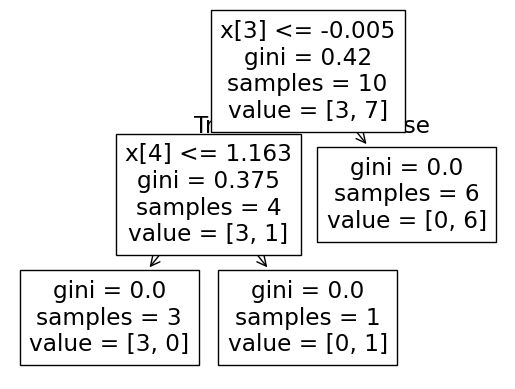

In [85]:
plot_tree(dtc1)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.46\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[4] <= 2.121\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

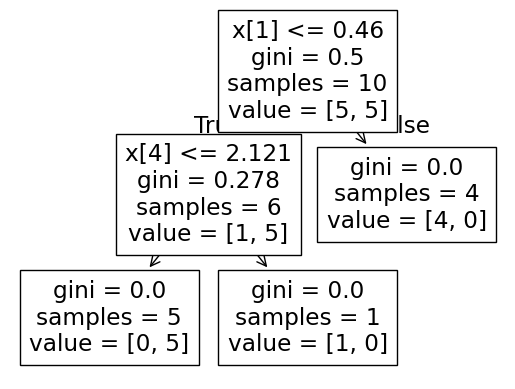

In [86]:
plot_tree(dtc2)

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.263\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.5, 'x[1] <= 1.089\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

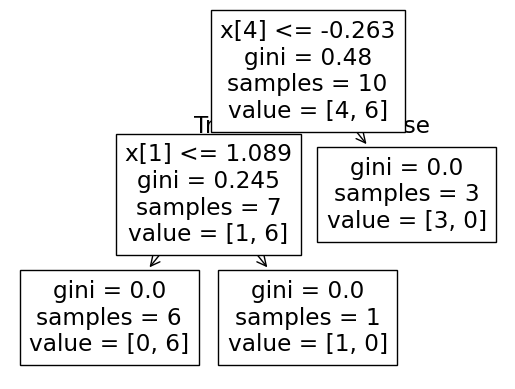

In [87]:
plot_tree(dtc3)

In [91]:
dtc1.predict(np.array([-1.639475, -1.410386, -0.717752, 0.070177, -0.973732]).reshape(1, 5))

array([1])

In [92]:
dtc2.predict(np.array([-1.639475, -1.410386, -0.717752, 0.070177, -0.973732]).reshape(1, 5))

array([1])

In [93]:
dtc3.predict(np.array([-1.639475, -1.410386, -0.717752, 0.070177, -0.973732]).reshape(1, 5))

array([1])

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
rfc=RandomForestClassifier()

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
rfc_pred=rfc.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, rfc_pred)

0.5833333333333334

In [22]:
rfc.predict(np.array([-1.639475, -1.410386, -0.717752, 0.070177, -0.973732]).reshape(1, 5))

array([1])

# Random Forest Demo

In [62]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [27]:
np.random.seed(4)
X, y=make_circles(n_samples=500, noise=0.35, random_state=4,factor=0.1)

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [30]:
X_train.shape

(400, 2)

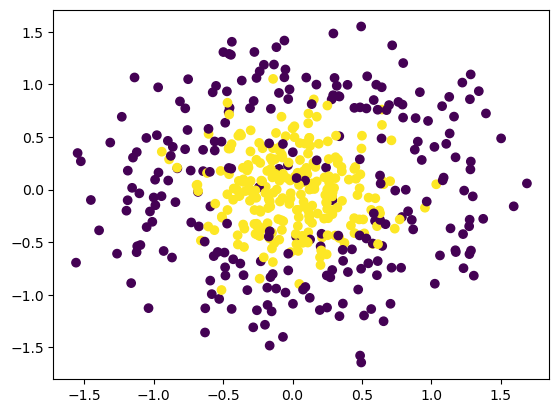

In [36]:
plt.scatter(X[:,0], X[:,-1], c=y)
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtc=DecisionTreeClassifier(random_state=4)

In [54]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [55]:
dtc_pred=dtc.predict(X_test)

In [56]:
print("r2_score for dtc -", r2_score(y_test, dtc_pred))

r2_score for dtc - 0.09053327821413781


In [66]:
print("Accuracy for dtc - ", accuracy_score(y_test, dtc_pred))

Accuracy for dtc -  0.78


In [57]:
rfc=RandomForestClassifier(random_state=4)

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [59]:
rfc_pred=rfc.predict(X_test)

In [60]:
print("r2_score for rfc -", r2_score(y_test, rfc_pred))

r2_score for rfc - 0.29723026043819745


In [67]:
print("Accuracy for rfc - ", accuracy_score(y_test, rfc_pred))

Accuracy for rfc -  0.83


# Hyperparameter Tuning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
df=pd.read_csv(r"C:\Users\joshi\Downloads\heart (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [78]:
X=df.iloc[:, 0:-1]
y=df.iloc[:,-1]

In [80]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [82]:
rfc=RandomForestClassifier()

In [83]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
rfc_pred=rfc.predict(X_test)

In [86]:
accuracy_score(y_test, rfc_pred)

1.0

In [87]:
from sklearn.model_selection import cross_val_score

In [89]:
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.9970588235294118)

## GridSearchCV

In [112]:
n_estimators=[20, 60, 100, 120]
max_features=[0.2, 0.6, 1]
max_depth=[2, 8, None]
max_samples=[0.5, 0.75, 1]

In [113]:
param_grid={'n_estimators':n_estimator,
           'max_features':max_features,
           'max_depth':max_depth,
           'max_samples':max_samples}

print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1]}


In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
gscv=GridSearchCV(estimator=rfc,
            param_grid=param_grid,
            cv=5,
            verbose=2,
            n_jobs=-1)

In [116]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1],
                         'max_samples': [0.5, 0.75, 1],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [117]:
gscv.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 100}

In [118]:
gscv.best_score_

np.float64(0.978048780487805)

## RandomSearchCV

In [119]:
n_estimators=[20, 60, 100, 120]
max_features=[0.2, 0.6, 1]
max_depth=[2, 8, None]
max_samples=[0.5, 0.75, 1]
bootstrap=[True, False]
min_samples_split=[2,5]
min_samples_leaf=[1,2]

In [120]:
param_grid={'n_estimators':n_estimator,
           'max_features':max_features,
           'max_depth':max_depth,
           'max_samples':max_samples,
           'bootstrap':bootstrap,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
rscv=RandomizedSearchCV(estimator=rfc,
            param_distributions=param_grid,
            cv=5,
            verbose=2,
            n_jobs=-1)

In [124]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1],
                                        'max_samples': [0.5, 0.75, 1],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [125]:
rscv.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}

In [126]:
gscv.best_score_

np.float64(0.978048780487805)

## OOB evaluation

In [127]:
df=pd.read_csv(r"C:\Users\joshi\Downloads\heart (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [128]:
X=df.iloc[:, 0:-1]
y=df.iloc[:,-1]

In [129]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [130]:
rfc=RandomForestClassifier(oob_score=True)

In [131]:
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [132]:
rfc_pred=rfc.predict(X_test)

In [133]:
accuracy_score(y_test, rfc_pred)

1.0

In [134]:
rfc.oob_score_

0.9963414634146341

# Feature Importance Using Random Forest

In [4]:
df=pd.read_csv('mnist.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

<Axes: >

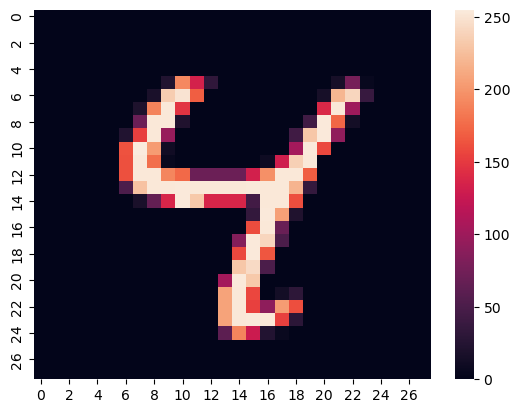

In [12]:
sns.heatmap(X.iloc[6].values.reshape(28, 28))

In [14]:
rfc=RandomForestClassifier()

In [15]:
rfc.fit(X, y)

RandomForestClassifier()

In [18]:
rfc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04424807e-05, 2.17285488e-06, 2.14165948e-06, 4.10950326e-06,
       9.89093555e-06, 1.78352883e-05, 3.24635957e-06, 6.11662353e-06,
       1.77466836e-06, 1.02964709e-05, 7.56582237e-06, 0.00000000e+00,
       4.29004726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<Axes: >

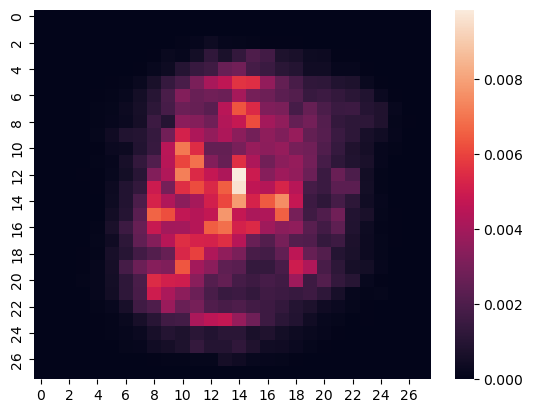

In [21]:
sns.heatmap(rfc.feature_importances_.reshape(28, 28))

##  How Feature Importance is calculated

In [27]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [25]:
X, y=make_classification(n_samples=5, n_features=2, n_informative=2, n_redundant=0, random_state=4)

In [29]:
dtc=DecisionTreeClassifier()

In [30]:
dtc.fit(X, y)

DecisionTreeClassifier()

In [31]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.546\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= -1.254\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -0.103\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

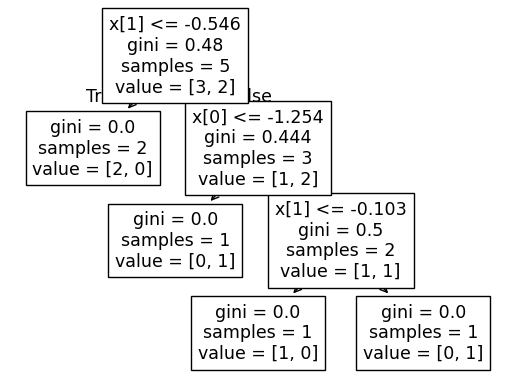

In [32]:
plot_tree(dtc)

In [33]:
dtc.feature_importances_

array([0.13888889, 0.86111111])

In [38]:
rfc=RandomForestClassifier(n_estimators=2)

In [39]:
rfc.fit(X, y)

RandomForestClassifier(n_estimators=2)

In [40]:
rfc.feature_importances_

array([0.58333333, 0.41666667])

In [51]:
print(rfc.estimators_[0].feature_importances_)
print(rfc.estimators_[1].feature_importances_)

[1. 0.]
[0.16666667 0.83333333]


In [52]:
print((rfc.estimators_[0].feature_importances_[0]+rfc.estimators_[1].feature_importances_[0])/2)
print((rfc.estimators_[0].feature_importances_[1]+rfc.estimators_[1].feature_importances_[1])/2)

0.5833333333333333
0.41666666666666674


# Boosting

## Adaboost

In [93]:
from mlxtend.plotting import plot_decision_regions

In [94]:
df=pd.DataFrame()

In [95]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['Label']=[1,1,0,1,0,1,0,1,0,0]

In [96]:
df

,X1,X2,Label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

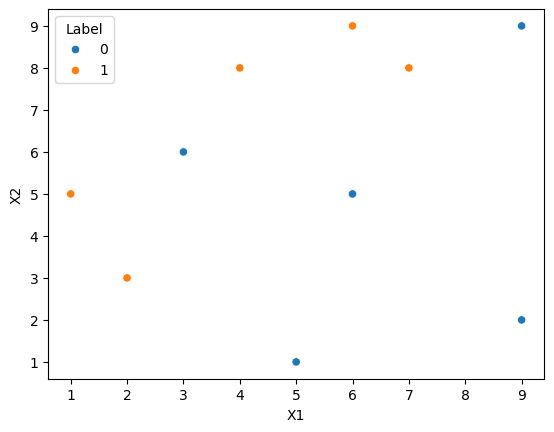

In [97]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Label'])

In [98]:
df['Weights1']=1/df.shape[0]
df

,X1,X2,Label,Weights1
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [99]:
dtc1=DecisionTreeClassifier(max_depth=1)

In [100]:
X=df.iloc[:,0:2].values
y=df.iloc[:, 2].values

In [101]:
dtc1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

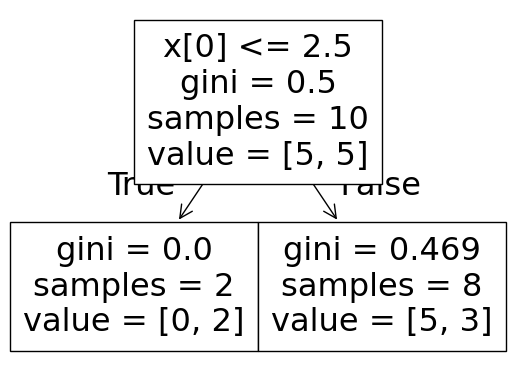

In [102]:
plot_tree(dtc1)

<Axes: >

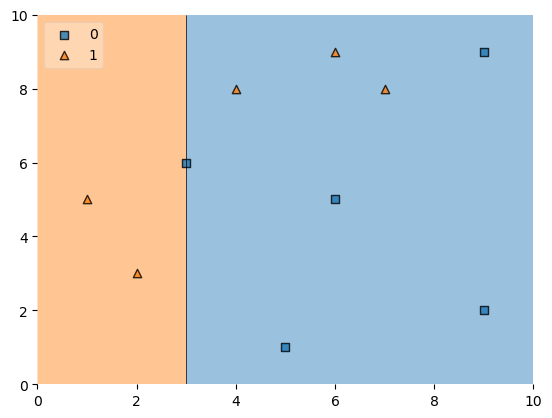

In [103]:
plot_decision_regions(X, y, clf=dtc1, legend=2)

In [104]:
df['y_pred1']=dtc1.predict(X)

In [105]:
df

,X1,X2,Label,Weights1,y_pred1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [106]:
def calculate_model_weight(error):
    return 0.5*(np.log((1-error)/error))

In [109]:
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [110]:
def update_row_weights(row, alpha=0.423):
    if row['Label']==row['y_pred1']:
        return row['Weights1']*np.exp(-alpha)
    else:
        return row['Weights1']*np.exp(alpha)

In [113]:
df['updated_weights']=df.apply(update_row_weights, axis=1)

In [114]:
df

,X1,X2,Label,Weights1,y_pred1,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [116]:
df['normalized_weight']=df['updated_weights']/sum(df['updated_weights'])

In [117]:
df

,X1,X2,Label,Weights1,y_pred1,updated_weights,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [118]:
sum(df['normalized_weight'])

1.0

In [120]:
df['upper_range']=np.cumsum(df['normalized_weight'])

In [123]:
df['lower_range']=df['upper_range']-df['normalized_weight']

In [127]:
df=df[['X1', 'X2', 'Label', 'Weights1', 'y_pred1', 'updated_weights', 'normalized_weight', 'lower_range', 'upper_range']]
df

,X1,X2,Label,Weights1,y_pred1,updated_weights,normalized_weight,lower_range,upper_range
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [131]:
def create_new_dataset(df):

    indices=[]

    for i in range(df.shape[0]):
        a=np.random.random()
        for index, row in df.iterrows():
            if row['upper_range']>a and a>row['lower_range']:
                indices.append(index)
    return indices

In [133]:
index_values=create_new_dataset(df)
index_values

[5, 7, 4, 3, 3, 5, 8, 4, 5, 0]

In [147]:
second_df=df.iloc[index_values, 0:4]
second_df

,X1,X2,Label,Weights1
5,6,9,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1


In [148]:
dtc2=DecisionTreeClassifier(max_depth=1)

In [149]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:, 2].values

In [150]:
dtc2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 3.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.625, 0.5, '  False')]

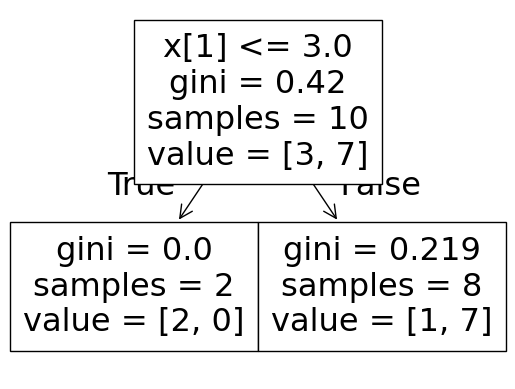

In [151]:
plot_tree(dtc2)

<Axes: >

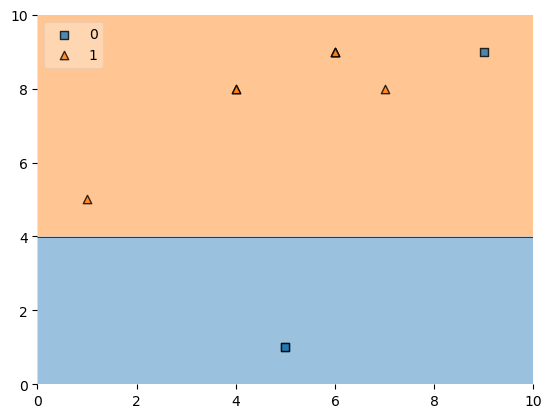

In [152]:
plot_decision_regions(X, y, clf=dtc2, legend=2)

In [155]:
second_df['y_pred2']=dtc2.predict(X)

In [156]:
second_df

,X1,X2,Label,Weights1,y_pred2
5,6,9,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,1


In [159]:
alpha2=calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [162]:
def update_row_weights(row, alpha=1.098):
    if row['Label']==row['y_pred2']:
        return row['Weights1']*np.exp(-alpha)
    else:
        return row['Weights1']*np.exp(alpha)

In [163]:
second_df['updated_weights']=second_df.apply(update_row_weights, axis=1)

In [164]:
second_df

,X1,X2,Label,Weights1,y_pred2,updated_weights
5,6,9,1,0.1,1,0.033354
7,7,8,1,0.1,1,0.033354
4,5,1,0,0.1,0,0.033354
3,4,8,1,0.1,1,0.033354
3,4,8,1,0.1,1,0.033354
5,6,9,1,0.1,1,0.033354
8,9,9,0,0.1,1,0.299816
4,5,1,0,0.1,0,0.033354
5,6,9,1,0.1,1,0.033354
0,1,5,1,0.1,1,0.033354


In [165]:
second_df['normalized_weight']=second_df['updated_weights']/sum(second_df['updated_weights'])

In [166]:
second_df['upper_range']=np.cumsum(second_df['normalized_weight'])

In [167]:
second_df['lower_range']=second_df['upper_range']-second_df['normalized_weight']

In [169]:
second_df=second_df[['X1', 'X2', 'Label', 'Weights1', 'y_pred2', 'updated_weights', 'normalized_weight', 'lower_range', 'upper_range']]
second_df

,X1,X2,Label,Weights1,y_pred2,updated_weights,normalized_weight,lower_range,upper_range
5,6,9,1,0.1,1,0.033354,0.055590,0.000000,0.055590
7,7,8,1,0.1,1,0.033354,0.055590,0.055590,0.111179
4,5,1,0,0.1,0,0.033354,0.055590,0.111179,0.166769
3,4,8,1,0.1,1,0.033354,0.055590,0.166769,0.222358
3,4,8,1,0.1,1,0.033354,0.055590,0.222358,0.277948
5,6,9,1,0.1,1,0.033354,0.055590,0.277948,0.333537
8,9,9,0,0.1,1,0.299816,0.499694,0.333537,0.833231
4,5,1,0,0.1,0,0.033354,0.055590,0.833231,0.888821
5,6,9,1,0.1,1,0.033354,0.055590,0.888821,0.944410
0,1,5,1,0.1,1,0.033354,0.055590,0.944410,1.000000


In [171]:
index_values=create_new_dataset(df)
index_values

[3, 5, 8, 7, 5, 6, 2, 3, 3, 4]

In [172]:
third_df=df.iloc[index_values, 0:4]
third_df

,X1,X2,Label,Weights1
3,4,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [173]:
dtc3=DecisionTreeClassifier(max_depth=1)

In [174]:
X=third_df.iloc[:,0:2].values
y=third_df.iloc[:, 2].values

In [175]:
dtc3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.5, '  False')]

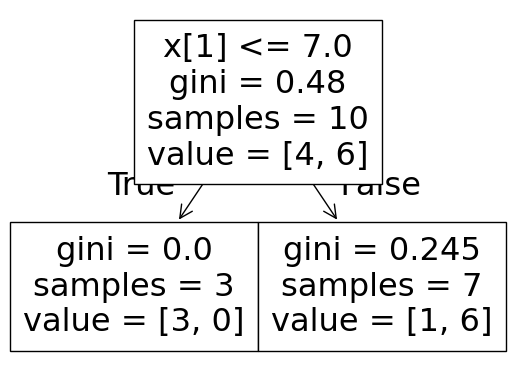

In [176]:
plot_tree(dtc3)

<Axes: >

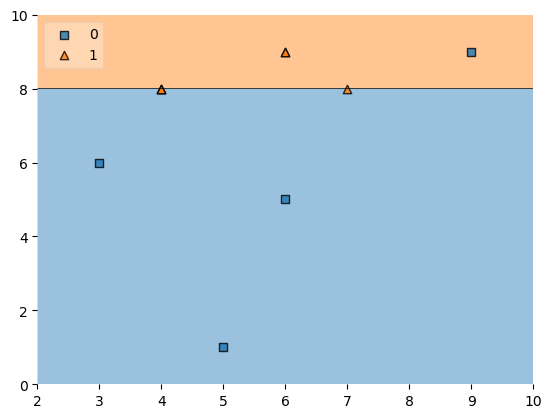

In [177]:
plot_decision_regions(X, y, clf=dtc3, legend=2)

In [180]:
third_df

,X1,X2,Label,Weights1,y_pred3
3,4,8,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0


In [182]:
third_df['y_pred3']=dtc3.predict(X)

alpha3=calculate_model_weight(0.1)
alpha3

np.float64(1.0986122886681098)

In [183]:
def update_row_weights(row, alpha=1.098):
    if row['Label']==row['y_pred3']:
        return row['Weights1']*np.exp(-alpha)
    else:
        return row['Weights1']*np.exp(alpha)

In [184]:
third_df['updated_weights']=third_df.apply(update_row_weights, axis=1)

In [186]:
third_df['normalized_weight']=third_df['updated_weights']/sum(third_df['updated_weights'])

third_df['upper_range']=np.cumsum(third_df['normalized_weight'])

third_df['lower_range']=third_df['upper_range']-third_df['normalized_weight']

third_df=third_df[['X1', 'X2', 'Label', 'Weights1', 'y_pred3', 'updated_weights', 'normalized_weight', 'lower_range', 'upper_range']]
third_df

,X1,X2,Label,Weights1,y_pred3,updated_weights,normalized_weight,lower_range,upper_range
3,4,8,1,0.1,1,0.033354,0.055590,0.000000,0.055590
5,6,9,1,0.1,1,0.033354,0.055590,0.055590,0.111179
8,9,9,0,0.1,1,0.299816,0.499694,0.111179,0.610873
7,7,8,1,0.1,1,0.033354,0.055590,0.610873,0.666463
5,6,9,1,0.1,1,0.033354,0.055590,0.666463,0.722052
6,6,5,0,0.1,0,0.033354,0.055590,0.722052,0.777642
2,3,6,0,0.1,0,0.033354,0.055590,0.777642,0.833231
3,4,8,1,0.1,1,0.033354,0.055590,0.833231,0.888821
3,4,8,1,0.1,1,0.033354,0.055590,0.888821,0.944410
4,5,1,0,0.1,0,0.033354,0.055590,0.944410,1.000000


In [187]:
print(alpha1+alpha2+alpha3)

2.6208735075298213


In [190]:
query=np.array([1,5]).reshape(1,2)

In [191]:
dtc1.predict(query)

array([1])

In [192]:
dtc2.predict(query)

array([1])

In [193]:
dtc3.predict(query)

array([0])

In [195]:
np.sign(alpha1*1+alpha2*1)

np.float64(1.0)

# Gradient Boosting

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
np.random.seed(4)
X=np.random.rand(100, 1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [26]:
df=pd.DataFrame()

In [27]:
df['X']=X.reshape(100)
df['y']=y

In [28]:
df

,X,y
0,0.467030,0.626107
1,0.047232,-0.070454
2,0.472684,0.713834
3,0.214816,0.129677
4,0.197729,0.119720
...,...,...
95,-0.310974,0.342795
96,-0.027379,-0.029444
97,-0.107219,0.015958
98,0.118930,0.019256


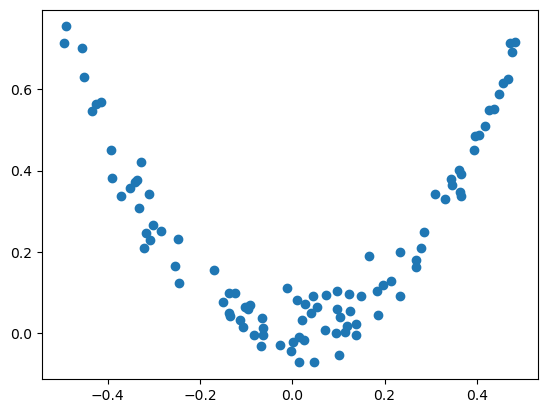

In [29]:
plt.scatter(df['X'], df['y'])
plt.show()

In [30]:
df['pred1']=y.mean()

In [31]:
df

,X,y,pred1
0,0.467030,0.626107,0.22743
1,0.047232,-0.070454,0.22743
2,0.472684,0.713834,0.22743
3,0.214816,0.129677,0.22743
4,0.197729,0.119720,0.22743
...,...,...,...
95,-0.310974,0.342795,0.22743
96,-0.027379,-0.029444,0.22743
97,-0.107219,0.015958,0.22743
98,0.118930,0.019256,0.22743


In [33]:
df['res1']=df['y']-df['pred1']

In [34]:
df

,X,y,pred1,res1
0,0.467030,0.626107,0.22743,0.398677
1,0.047232,-0.070454,0.22743,-0.297884
2,0.472684,0.713834,0.22743,0.486403
3,0.214816,0.129677,0.22743,-0.097753
4,0.197729,0.119720,0.22743,-0.107710
...,...,...,...,...
95,-0.310974,0.342795,0.22743,0.115365
96,-0.027379,-0.029444,0.22743,-0.256874
97,-0.107219,0.015958,0.22743,-0.211473
98,0.118930,0.019256,0.22743,-0.208175


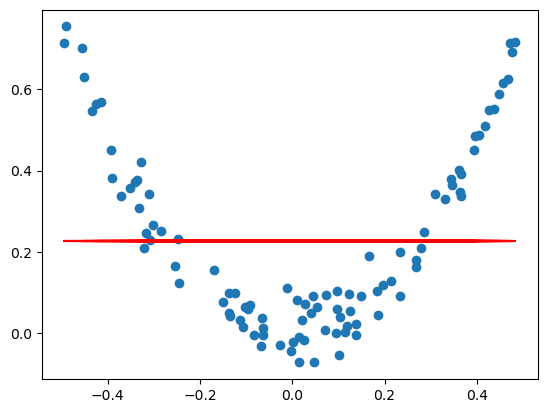

In [36]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='r')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtr1=DecisionTreeRegressor(max_leaf_nodes=8)

In [43]:
dtr1.fit(df['X'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [45]:
from sklearn.tree import plot_tree

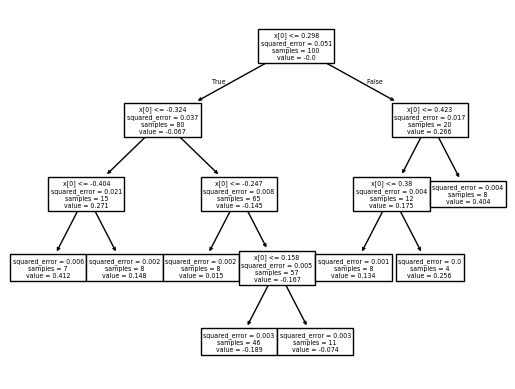

In [47]:
plot_tree(dtr1)
plt.show()

In [49]:
X_test=np.linspace(-0.5, 0.5, 500)

In [52]:
y_pred=0.22743+dtr1.predict(X_test.reshape(500, 1))

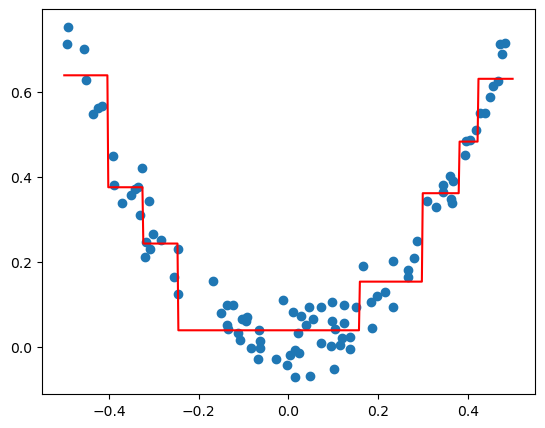

In [58]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(X_test, y_pred, color='r')
plt.scatter(df['X'], df['y'])
plt.show()

In [62]:
df['pred2']=0.22743+dtr1.predict(df['X'].values.reshape(100, 1))

In [63]:
df

,X,y,pred1,res1,pred2
0,0.467030,0.626107,0.22743,0.398677,0.631335
1,0.047232,-0.070454,0.22743,-0.297884,0.038247
2,0.472684,0.713834,0.22743,0.486403,0.631335
3,0.214816,0.129677,0.22743,-0.097753,0.153003
4,0.197729,0.119720,0.22743,-0.107710,0.153003
...,...,...,...,...,...
95,-0.310974,0.342795,0.22743,0.115365,0.242833
96,-0.027379,-0.029444,0.22743,-0.256874,0.038247
97,-0.107219,0.015958,0.22743,-0.211473,0.038247
98,0.118930,0.019256,0.22743,-0.208175,0.038247


In [64]:
df['res2']=df['y']-df['pred2']

In [65]:
df

,X,y,pred1,res1,pred2,res2
0,0.467030,0.626107,0.22743,0.398677,0.631335,-0.005228
1,0.047232,-0.070454,0.22743,-0.297884,0.038247,-0.108701
2,0.472684,0.713834,0.22743,0.486403,0.631335,0.082498
3,0.214816,0.129677,0.22743,-0.097753,0.153003,-0.023326
4,0.197729,0.119720,0.22743,-0.107710,0.153003,-0.033283
...,...,...,...,...,...,...
95,-0.310974,0.342795,0.22743,0.115365,0.242833,0.099962
96,-0.027379,-0.029444,0.22743,-0.256874,0.038247,-0.067691
97,-0.107219,0.015958,0.22743,-0.211473,0.038247,-0.022290
98,0.118930,0.019256,0.22743,-0.208175,0.038247,-0.018992


In [66]:
dtr2=DecisionTreeRegressor(max_leaf_nodes=8)

In [67]:
dtr2.fit(df['X'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

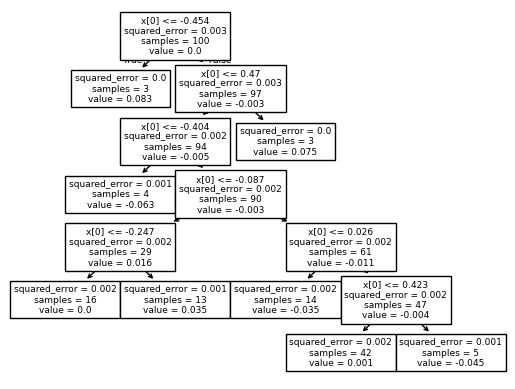

In [68]:
plot_tree(dtr2)
plt.show()

In [70]:
y_pred=0.22743+dtr1.predict(X_test.reshape(-1, 1))+dtr1.predict(X_test.reshape(-1, 1))

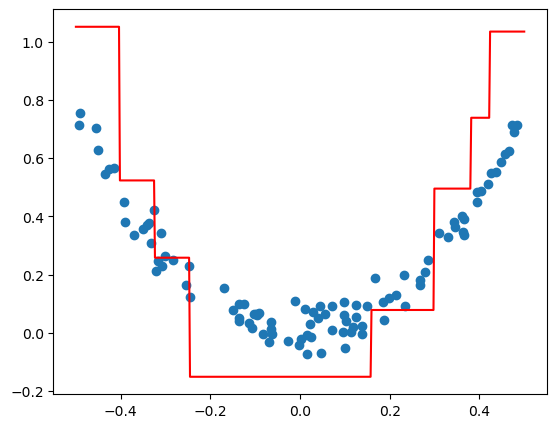

In [74]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(X_test, y_pred, color='r')
plt.scatter(df['X'], df['y'])
plt.show()

# Gradient boosting in Regression Setting

In [78]:
df=pd.DataFrame()

In [79]:
df['randd_spend']=[165, 101, 29]
df['administration']=[132, 97, 127]
df['marketing_spend']=[472, 250, 201]
df['profit']=[192, 144, 91]

In [80]:
df

,randd_spend,administration,marketing_spend,profit
0,165,132,472,192
1,101,97,250,144
2,29,127,201,91


In [81]:
df['f0(x)']=df['profit'].mean()

In [82]:
df

,randd_spend,administration,marketing_spend,profit,f0(x)
0,165,132,472,192,142.333333
1,101,97,250,144,142.333333
2,29,127,201,91,142.333333


In [83]:
df['ri1']=df['profit']-df['f0(x)']

In [84]:
df

,randd_spend,administration,marketing_spend,profit,f0(x),ri1
0,165,132,472,192,142.333333,49.666667
1,101,97,250,144,142.333333,1.666667
2,29,127,201,91,142.333333,-51.333333


In [86]:
dtr=DecisionTreeRegressor(max_depth=1)

In [87]:
dtr.fit(df.iloc[:, 0:3].values, df['ri1'].values)

DecisionTreeRegressor(max_depth=1)

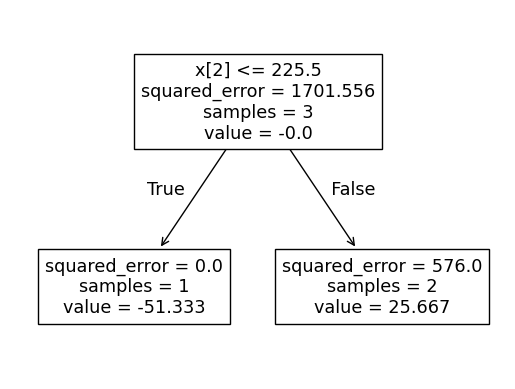

In [89]:
plot_tree(dtr)
plt.show()

# Stacking and Blending

In [3]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('heart_disease (1).csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
X=df.iloc[:, 0:-1]
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
estimators=[
    ('rfc', RandomForestClassifier(n_estimators=10, random_state=4)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbc', GradientBoostingClassifier())
]

In [25]:
from sklearn.ensemble import StackingClassifier

In [27]:
clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10)

In [29]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rfc',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=4)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbc', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [32]:
y_pred=clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.9853658536585366